<a href="https://colab.research.google.com/github/Atharv-2004/YuluHypothesisTesting/blob/main/YuluHypothesisTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')


In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


we dont have any null in any feature

In [ ]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Season, Holiday, Working Day, and Weather are considered categorical variables.

In [ ]:
data.describe(include=object)

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


In [ ]:
cat_variables=['season', 'holiday', 'workingday','weather']
for i in cat_variables:
  print('unique values in {0} are {1}'.format(i,data[i].unique()))

unique values in season are [1 2 3 4]
unique values in holiday are [0 1]
unique values in workingday are [0 1]
unique values in weather are [1 2 3 4]


**Season**:
- 1: Spring
- 2: Summer
- 3: Fall
- 4: Winter

**Holiday**:
- Indicates whether the day is a holiday or not.

**Working Day**:
- A value of 1 indicates a day that is neither a weekend nor a holiday. A value of 0 means it's either a weekend or a holiday.

**Weather**:
- 1: Clear, Few clouds, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog


<Axes: xlabel='season', ylabel='count'>

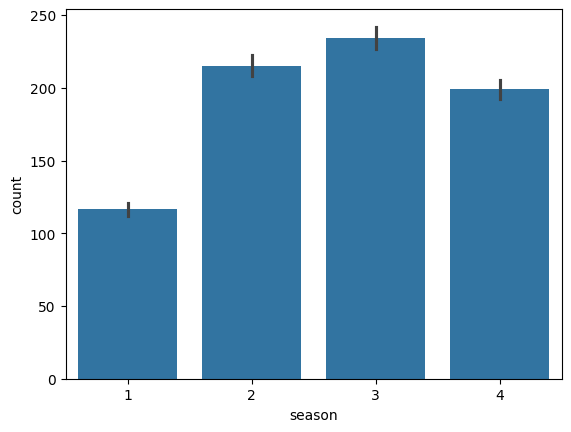

In [ ]:
sns.barplot(x='season', y='count', data=data)

In [ ]:
data.groupby('season')['count'].mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

Fewer people use vehicles during the spring season, while bookings increase during the fall season.

<Axes: xlabel='holiday', ylabel='count'>

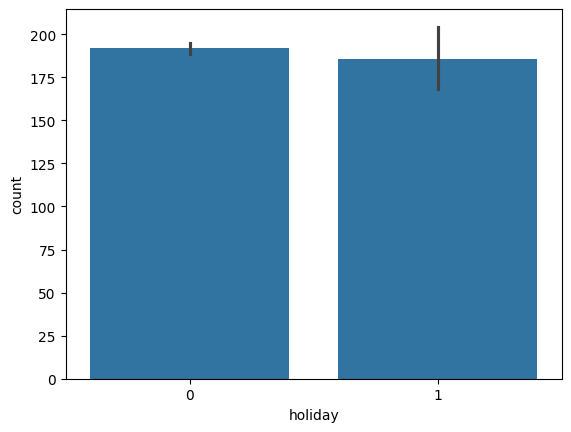

In [ ]:
sns.barplot(x='holiday', y='count', data=data)

<Axes: xlabel='workingday', ylabel='count'>

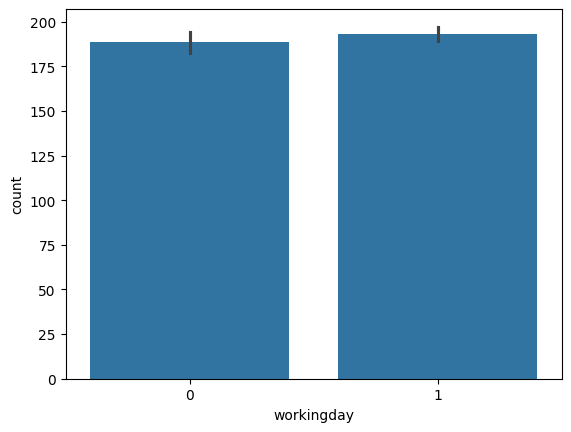

In [ ]:
sns.barplot(x='workingday', y='count', data=data)

Whether it's a working day or a holiday does not significantly impact the number of vehicles hired.

<Axes: xlabel='weather', ylabel='count'>

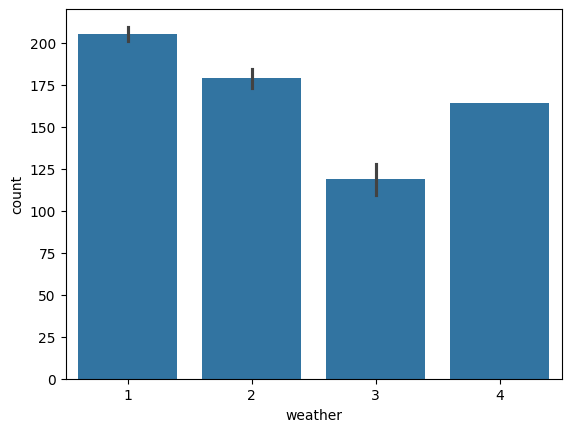

In [ ]:
sns.barplot(x='weather', y='count', data=data)

People are more likely to hire vehicles when the weather is clear, with a few clouds or partly cloudy skies.

However, fewer people tend to hire vehicles when the weather involves mist and clouds, broken clouds, or varying levels of mist.

And the number of vehicle hires further decreases when the weather involves light snow, light rain with thunderstorms, or scattered clouds.

The fewest hires occur in weather conditions that include heavy rain, ice pellets, thunderstorms with mist, or snow and fog.

In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Feature Engineering
In first look it seems count is sum of Casual & registered. Let us check if it is true

In [ ]:
data['check']= data['casual']+data['registered']

In [ ]:
(data['check']==data['count']).value_counts()

True    10886
Name: count, dtype: int64

In [ ]:
data.drop('check',axis='columns',inplace=True)

Since we know that our goal is to predict `count`, the `casual` and `registered` variables become unnecessary. They don't add new information because they're part of what makes up `count`. Let's remove them from the dataset to avoid redundancy.

In [ ]:
data.drop(['casual','registered'],axis='columns',inplace=True)

In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


Currently, the `datetime` column isn't providing much information. We could extract the following details:

1. **Year**: This isn't useful for our analysis.

2. **Date**: This also doesn't offer any relevant insights.

3. **Month**: This might help us understand the season, but we already have a separate column for that.

4. **Time**: This can indicate whether it's morning, afternoon, evening, or night, which might affect the `count`. Let's explore this further to see if it has any impact.

In [ ]:
data[['date','time']] = data['datetime'].str.split(' ',expand=True)

In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,date,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011-01-01,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011-01-01,01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011-01-01,02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011-01-01,03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011-01-01,04:00:00


In [ ]:
data[['hour','minute','sec']] = data['time'].str.split(':',expand=True)

In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,date,time,hour,minute,sec
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011-01-01,00:00:00,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011-01-01,01:00:00,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011-01-01,02:00:00,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011-01-01,03:00:00,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011-01-01,04:00:00,04,00,00


In [ ]:
data.drop(['datetime','date','minute','sec','time'],axis='columns',inplace=True)

In [ ]:
data.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,00
1,1,0,0,1,9.02,13.635,80,0.0,40,01
2,1,0,0,1,9.02,13.635,80,0.0,32,02
3,1,0,0,1,9.84,14.395,75,0.0,13,03
4,1,0,0,1,9.84,14.395,75,0.0,1,04


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   hour        10886 non-null  object 
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


In [ ]:
data['hour']=data['hour'].astype(int)

In [ ]:
#Replacing hour=0 to hour=24 as it is midnight and 24 will be easy for our calculation

data['hour'] = data ['hour'].replace ( [00],24)

We assume that data recorded at midnight (00:00) represents the number of vehicles booked from 11:00 PM to midnight. This might reflect how the data was collected.


In [ ]:
data['day_duration']=pd.cut(x=data['hour'],include_lowest=True, bins=[1,4,8,12,16,20,24],labels=['midnight-4','4-8','8-12','12-16','16-20','20-midnight'])

In [ ]:
data.drop('hour',inplace=True,axis='columns')

<Axes: xlabel='day_duration', ylabel='count'>

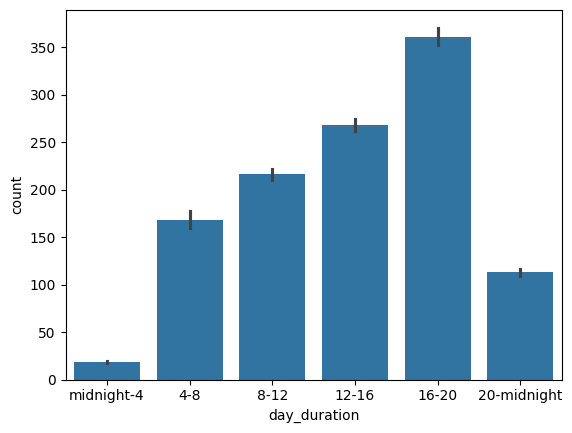

In [ ]:
sns.barplot(x='day_duration', y='count', data=data)

This graph demonstrates that the time of day influences vehicle bookings. Most vehicles are booked between 4:00 and 8:00 PM, while bookings decrease significantly between midnight and 4:00 AM.

Outlier Treatment

<ipython-input-47-c36a5fb16e45>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['count'])


<Axes: xlabel='count', ylabel='Density'>

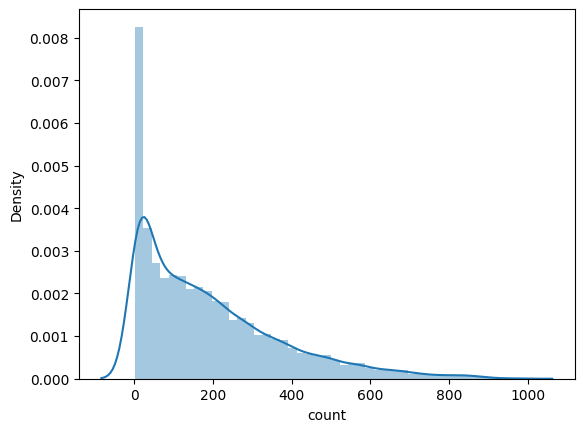

In [ ]:
sns.distplot(data['count'])

The data appears to be right-skewed, as indicated by the shape of the figure.

In [ ]:
data['log_count']=np.log(data['count'])

<ipython-input-49-2b6618930c29>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['log_count'])


<Axes: xlabel='log_count', ylabel='Density'>

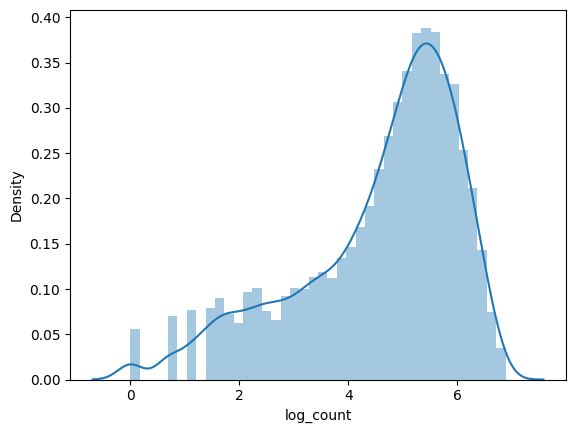

In [ ]:
sns.distplot(data['log_count'])

After applying a logarithmic transformation, the data becomes approximately normally distributed.

Let's also examine how taking the log affects outliers.

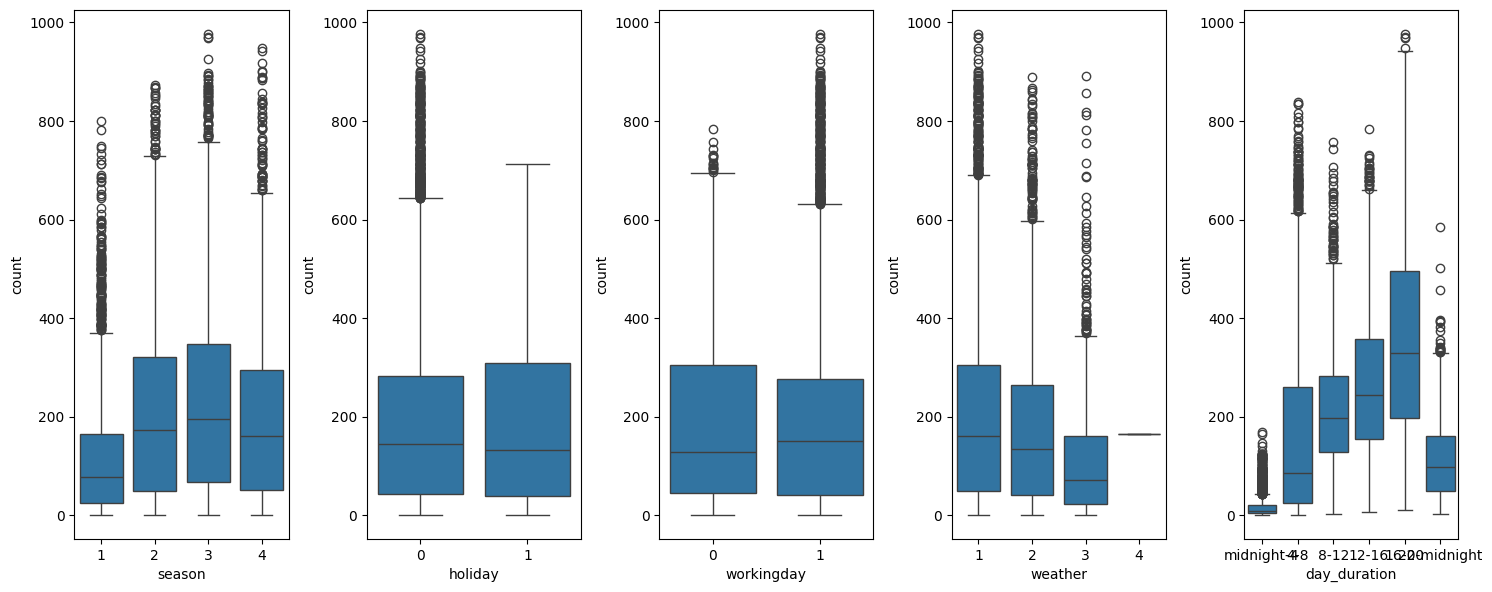

In [ ]:
plt.figure(figsize=(15,6))
categorical_features=['season', 'holiday', 'workingday','weather','day_duration']

for i,j in enumerate(categorical_features):
 plt.subplot(1,len(categorical_features),i+1)
 plt.subplots_adjust(hspace = 0.8)
 sns.boxplot(x=j, y='count', data=data)
 plt.tight_layout(pad=1)

The figure above shows that the median is the same for both holidays and working days. Based on this visual observation, it appears that whether a day is a working day or a holiday doesn't impact the `count`. However, hypothesis testing can provide a more definitive conclusion.

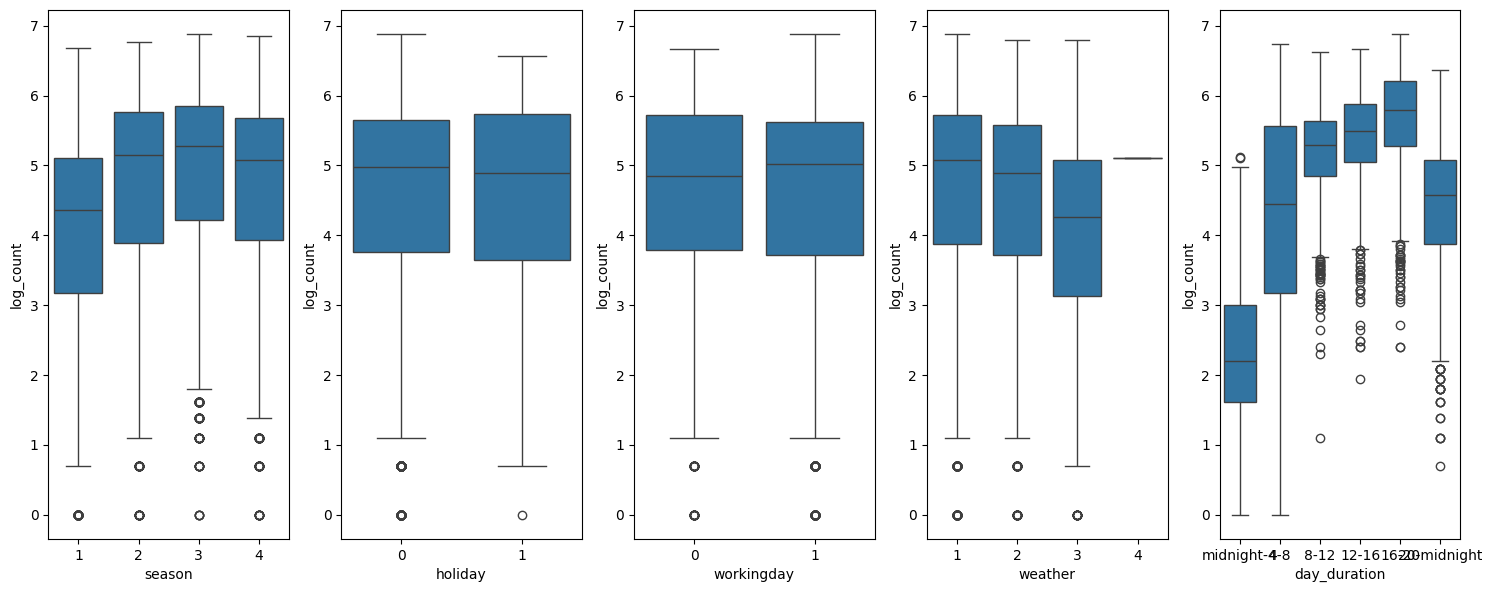

In [ ]:
plt.figure(figsize=(15,6))
categorical_features=['season', 'holiday', 'workingday','weather','day_duration']

for i,j in enumerate(categorical_features):
 plt.subplot(1,len(categorical_features),i+1)
 plt.subplots_adjust(hspace = 0.8)
 sns.boxplot(x=j, y='log_count', data=data)
 plt.tight_layout(pad=1)

<Axes: ylabel='count'>

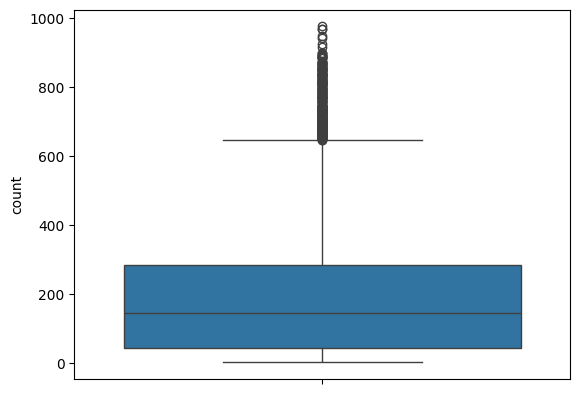

In [ ]:
sns.boxplot(data['count'])

<Axes: ylabel='log_count'>

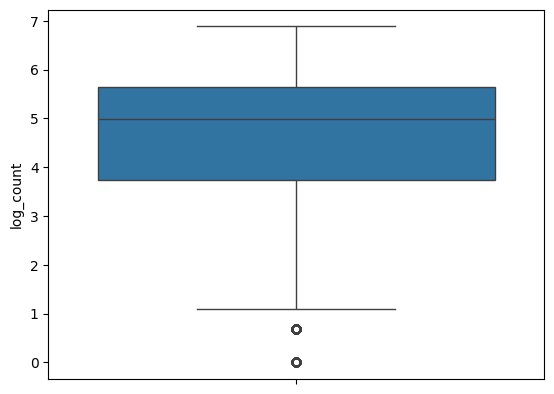

In [ ]:
sns.boxplot(data['log_count'])

The figures above show that the logarithmic transformation has significantly reduced the number of outliers.

In [ ]:
 q1=data['count'].quantile(0.25)
 q3=data['count'].quantile(0.75)
 iqr=q3-q1
 outlier_data=data[(data['count']<q1-1.5*iqr) | (data['count']>q3+1.5*iqr)]
 outlier_data.shape

(300, 11)

It is evident that we have 300 outliers, which represent only a small fraction of the entire dataset. These outliers don't appear to carry any unique information. We can choose to delete them, or alternatively, we could use the `log_count` for the remainder of our analysis. For our hypothesis testing, we'll use the `log_count` variable.

In [ ]:
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day_duration,log_count
0,1,0,0,1,9.84,14.395,81,0.0,16,20-midnight,2.772589
1,1,0,0,1,9.02,13.635,80,0.0,40,midnight-4,3.688879
2,1,0,0,1,9.02,13.635,80,0.0,32,midnight-4,3.465736
3,1,0,0,1,9.84,14.395,75,0.0,13,midnight-4,2.564949
4,1,0,0,1,9.84,14.395,75,0.0,1,midnight-4,0.000000


Let's now focus on how the continuous variables affect our target variable, which is `count`.

(For the time being, let's set aside `log_count`.)

In [ ]:
print(data.dtypes)

season             int64
holiday            int64
workingday         int64
weather            int64
temp             float64
atemp            float64
humidity           int64
windspeed        float64
count              int64
day_duration    category
log_count        float64
dtype: object


In [ ]:
numeric_data = data.select_dtypes(include=[np.number])  # Selects only numeric columns


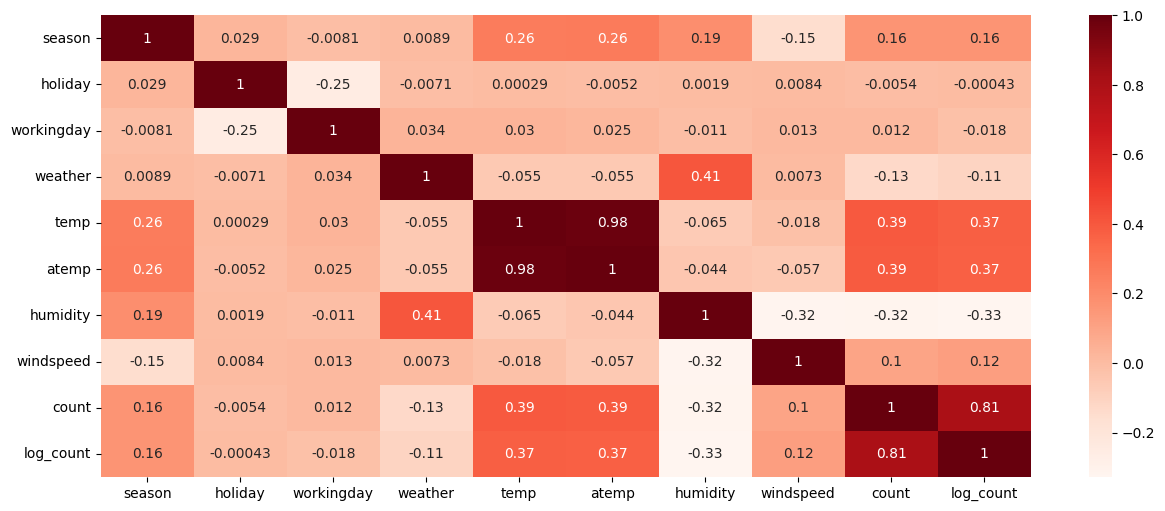

In [ ]:
plt.figure(figsize=(15, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='Reds')
plt.show()

It's clear that `count` is correlated with `temp`.

<Axes: xlabel='temp', ylabel='count'>

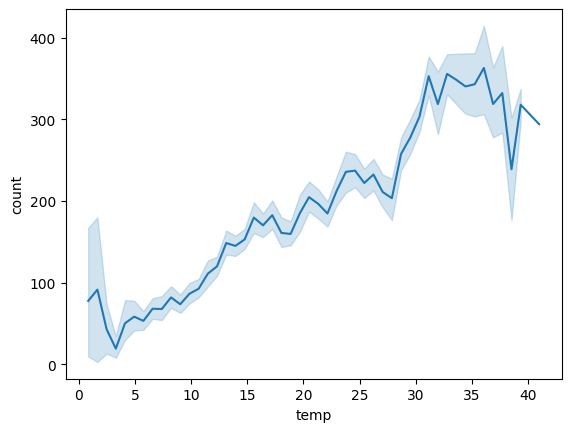

In [ ]:
sns.lineplot(x='temp',y='count',data=data)

<Axes: xlabel='atemp', ylabel='count'>

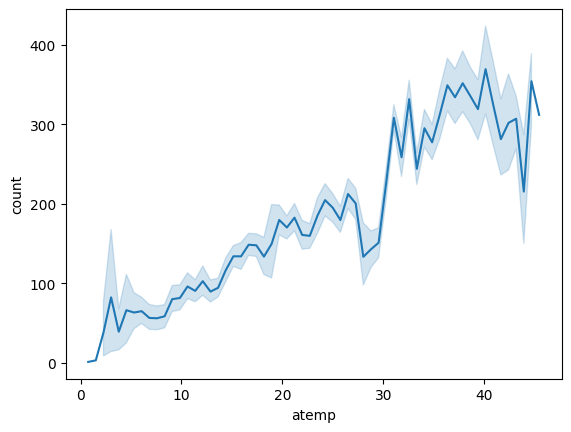

In [ ]:
sns.lineplot(x='atemp',y='count',data=data)

<Axes: xlabel='humidity', ylabel='count'>

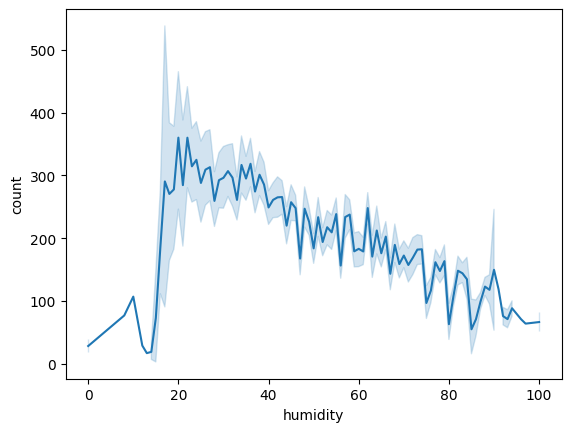

In [ ]:
sns.lineplot(x='humidity',y='count',data=data)

<Axes: xlabel='windspeed', ylabel='count'>

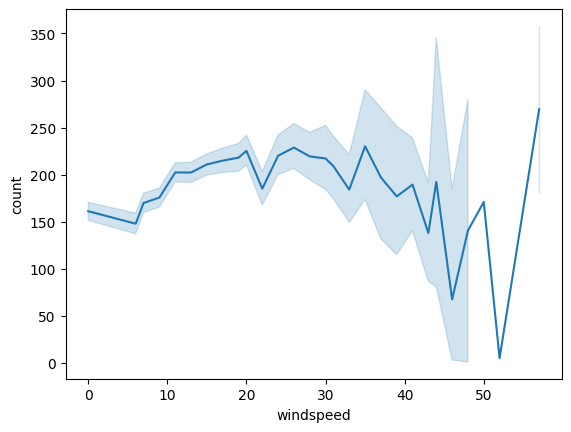

In [ ]:
sns.lineplot(x='windspeed',y='count',data=data)

The above images show that `count` has a linear relationship with temperature, but it is inversely related to both humidity and wind speed.

**Hypothesis** **Testing**

**Anova**

**Why are we Using Anova??**

because we have more than 2 groups

1.No. of cycles rented similar or different in different seasons

NULL HYPOTHESIS: μ1 = μ2 = μ3 = μ3. The mean Count in every season is same.

ALTERNATIVE HYPOTHESIS: Atleast one of mean of count is not same

**Anova and all parametric tests assume-**

Normality:- Values in each sampled groups are assumed to be drawn from normally distributed populations. We can use normal probability plot or Q-Q plot to check normality.

Homogeneity of variance:- All the c group variances are equal, that is σ₁² = σ₂² = σ₃² = … = σ𝒸².

**Assumptions Test for Anova**

Anova assumes normality and also it assumes variances is same across all groups.

**Normality test**

**Shapiro-Wilk’s test**

We will test the

null hypothesis: count follows normal distribution

against the

alternative hypothesis: count doesn't follow normal distribution

In [ ]:
from scipy.stats import shapiro
# find the p-value
w, p_value = shapiro(data['count'])
print('The p-value is', p_value)

The p-value is 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


According to the SciPy documentation, this test is unreliable when the number of data points exceeds 5000. Let's consider using a different test.

**Let's do normality test using distplot.**

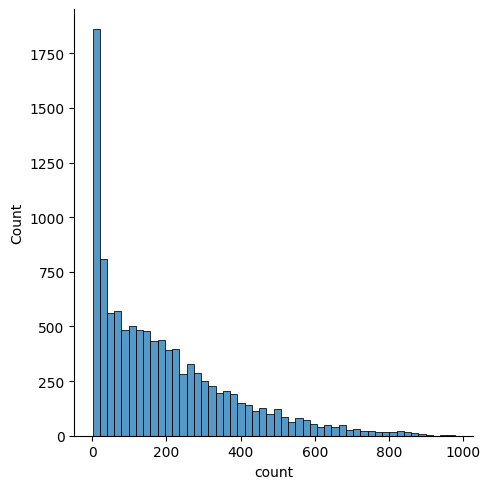

In [ ]:
sns.displot(data['count'],bins=50)


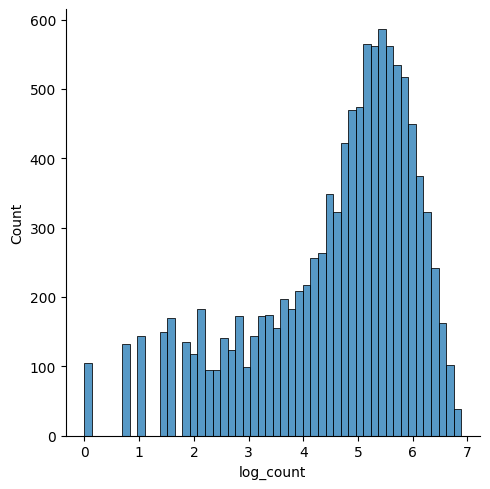

In [ ]:
sns.displot(data['log_count'],bins=50)

The distribution plot shows that `count` is not normally distributed, whereas `log_count` appears to follow a normal distribution.

Let's consider another test for normality: the QQ-Plot.

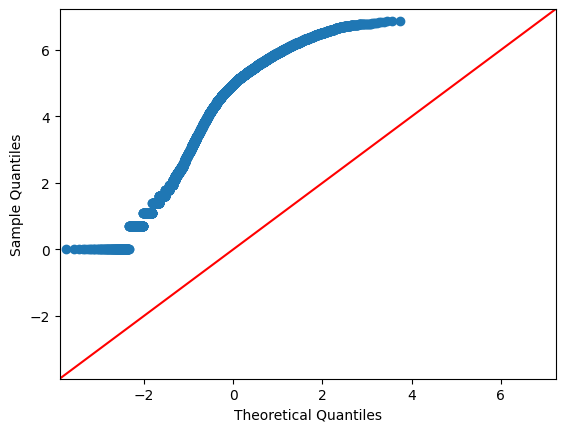

In [ ]:
import numpy as np
import statsmodels.api as sm
import pylab as py

sm.qqplot(data['log_count'], line ='45')
py.show()

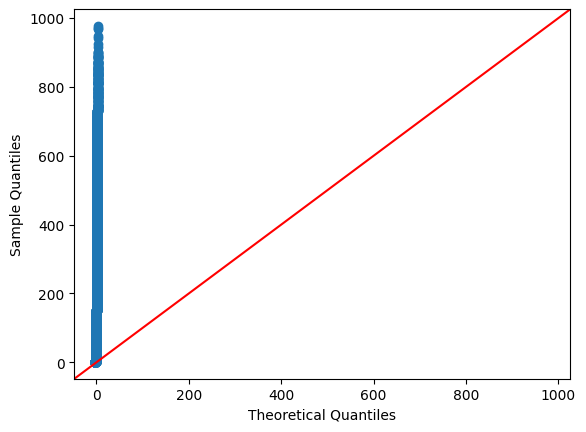

In [ ]:
import numpy as np
import statsmodels.api as sm
import pylab as py

sm.qqplot(data['count'], line ='45')
py.show()

Neither of the two variables appears to be normally distributed according to the QQ-plot. However, `log_count` has a distribution that is closer to normal.

Given that we have a large dataset, we'll proceed with our analysis using `log_count`.

**Test for Equality of Variances**

**Levene's test is designed to test the following:**

Null Hypothesis: All the variances of the `count` variable are equal.

Alternative Hypothesis: At least one of the variances is different from the others.


In [ ]:
data.groupby('season')['log_count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,3.984206,1.539737,0.0,3.178054,4.356709,5.099866,6.685861
2,2733.0,4.703267,1.462172,0.0,3.891820,5.147494,5.771441,6.771936
3,2733.0,4.860311,1.378662,0.0,4.219508,5.273000,5.849325,6.884487
4,2734.0,4.652650,1.421134,0.0,3.931826,5.081404,5.683580,6.854355


It appears that the standard deviation is roughly the same across all groups, suggesting there may not be significant differences in variance. Let's validate this with a statistical test.

In [ ]:
from scipy.stats import levene
statistic, p_value = levene(
 data[data['season']==1]['log_count'].sample(2686),
 data[data['season']==2]['log_count'].sample(2686),
 data[data['season']==3]['log_count'].sample(2686),
 data[data['season']==4]['log_count'].sample(2686)
 )
# find the p-value
print('The p-value is ',p_value)

The p-value is  1.3737084353758112e-06


The p-value is greater than 0.05, indicating that the null hypothesis is true, suggesting there's no significant variation in variances.

Now let's proceed to test with ANOVA. The alternate and null hypotheses are detailed above.

In [ ]:
from scipy.stats import f_oneway
# find the p-value
test_stat, p_value = f_oneway(data[data['season']==1]['log_count'].sample(2686),
 data[data['season']==2]['log_count'].sample(2686),
 data[data['season']==3]['log_count'].sample(2686),
 data[data['season']==4]['log_count'].sample(2686))
# print the p-value
print('The p-value is', p_value)

The p-value is 3.6651271417868455e-122


The p-value is low, indicating that the null hypothesis is false.

This suggests that the mean count varies across different seasons, implying that the season has an impact on count.

This conclusion is statistically validated.

**Hypothesis testing using t-test**

Let's perform a hypothesis test to check whether working days impact the count of cycles hired.

**Step 1: State the Null and Alternative Hypotheses**
- **Null Hypothesis (H0)**: The number of cycles hired on weekdays is the same as on weekends.
- **Alternative Hypothesis (Ha)**: The number of cycles hired on weekdays is different from weekends.

**Step 2: Determine the Significance Level**
- If the p-value is less than 0.05 (α = 0.05), we'll reject the null hypothesis.

**Step 3: Select the Test Method**
- Since the population's standard deviation is unknown, a t-test is appropriate.
- The "not equal to" sign in the alternative hypothesis indicates that this is a two-tailed test.

In [ ]:
data.groupby('workingday')['log_count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,4.591984,1.381237,0.0,3.784190,4.85203,5.717028,6.663133
1,7412.0,4.534084,1.536713,0.0,3.713572,5.01728,5.624018,6.884487


In [ ]:
working_day=data[data['workingday']==1]['log_count'].sample(3474)
non_working_day=data[data['workingday']==0]['log_count'].sample(3474)

In [ ]:
from scipy import stats
alpha=0.05
t_statistic, p_value = stats.ttest_ind(working_day,non_working_day,alternative='two-sided')

In [ ]:
print("Test statistic = {} , Pvalue ={} ".format(t_statistic,p_value ))

Test statistic = -1.558070460173279 , Pvalue =0.11926210453391094 


The p-value is below 0.05, leading to a rejection of the null hypothesis. This suggests that the count is indeed affected by whether the day is a working day or not.

Hypothesis Testing with the Chi-Squared Test
Both weather and season are categorical variables.

This is a test of independence.

We are investigating whether weather and season are related.

**Null Hypothesis**: The proportion of weather types is the same across all seasons.

**Alternative Hypothesis**: The proportion of weather types varies across different seasons.

In [ ]:
contigency= pd.crosstab(data.weather, data.season)
contigency

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


Let's exclude Weather = 4 from our analysis.

**Weather Categories:**
- 1: Clear, Few clouds, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog

**Season Categories:**
- 1: Spring
- 2: Summer
- 3: Fall
- 4: Winter


In [ ]:
data = data[data.weather != 4]

In [ ]:
contigency= pd.crosstab(data.weather, data.season)
contigency

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225


In [ ]:
from scipy.stats import chi2_contingency # For Chi-Sq

In [ ]:
chi2, pval, dof, exp_freq = chi2_contingency(contigency)
print("chi-square statistic: {} , Pvalue: {} , Degree of freedom: {} ,expected frequency:{} ".format(chi2, pval, dof, exp_freq))

chi-square statistic: 46.101457310732485 , Pvalue: 2.8260014509929403e-08 , Degree of freedom: 6 ,expected frequency:[[1774.04869086 1805.76352779 1805.76352779 1806.42425356]
 [ 699.06201194  711.55920992  711.55920992  711.81956821]
 [ 211.8892972   215.67726229  215.67726229  215.75617823]] 


The p-value is low, indicating a rejection of the null hypothesis. This suggests that weather proportions vary across different seasons, implying that season has an impact on weather.

**Key Observations**

- Fewer people hire vehicles during the spring season, while bookings are higher during the fall.
- Fewer cycles are hired when it’s raining lightly, but more are hired when the weather is clear.
- Most bookings occur between 4 PM and 8 PM, with significantly fewer between midnight and 4 AM.
- The `count` variable shows a linear relationship with temperature and an inverse relationship with humidity and wind speed.

**Recommendations**

- To meet customer demand, increase the availability of vehicles during peak booking hours. Conversely, reduce the number of available vehicles at night to save costs.
- Hire more vehicles for the fall season to accommodate the higher booking rate.